In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression

In [90]:
df= pd.read_csv("data/insurance.csv")

### EDA

In [91]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [92]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [94]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [95]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [96]:
df.shape

(1338, 7)

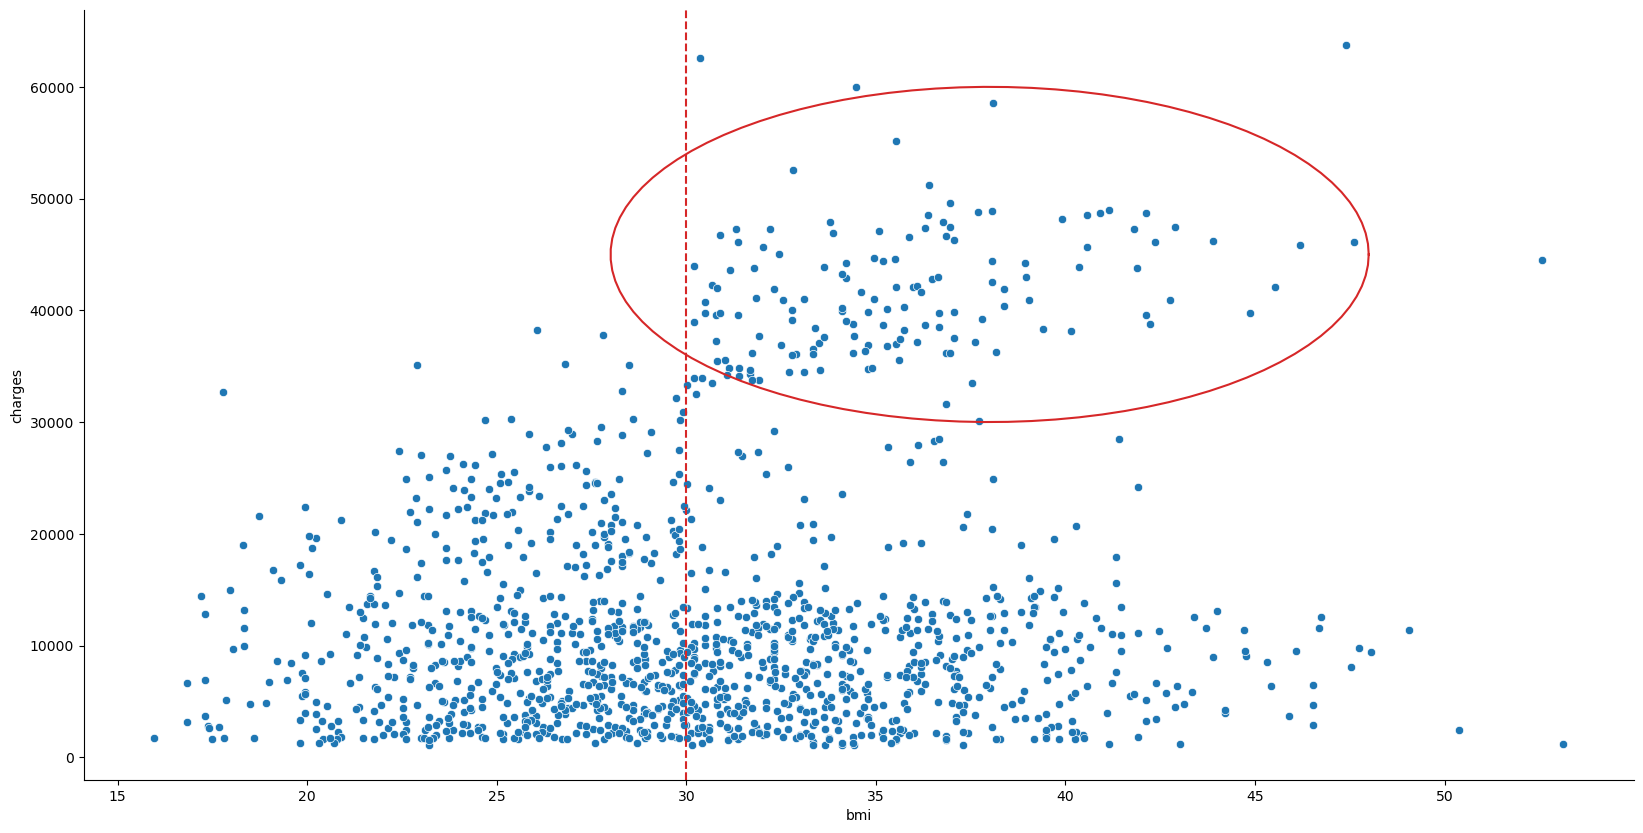

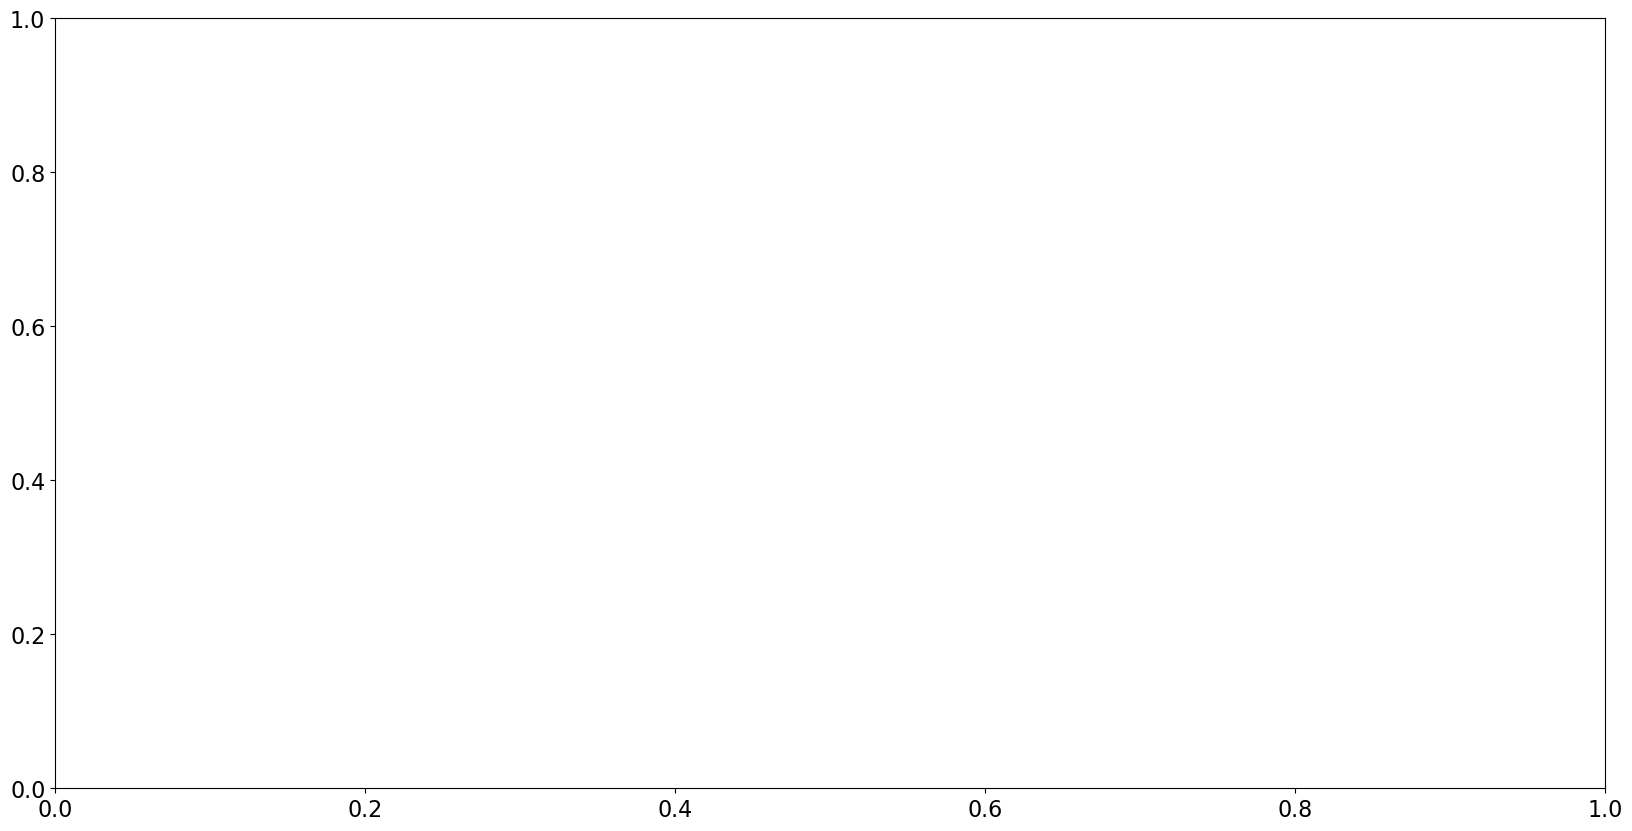

In [110]:
plt.figure(figsize=(20, 10))
ax = sns.scatterplot(data=df, x='bmi', y='charges')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.axvline(30, ls='--', color='tab:red')
an = np.linspace(0, 2 * np.pi, 100)
ax.plot(10 * np.cos(an) + 38, 15000 * np.sin(an) + 45000, color='tab:red')
plt.figure(figsize=(20, 10))
plt.tick_params(labelsize=16)
plt.show()

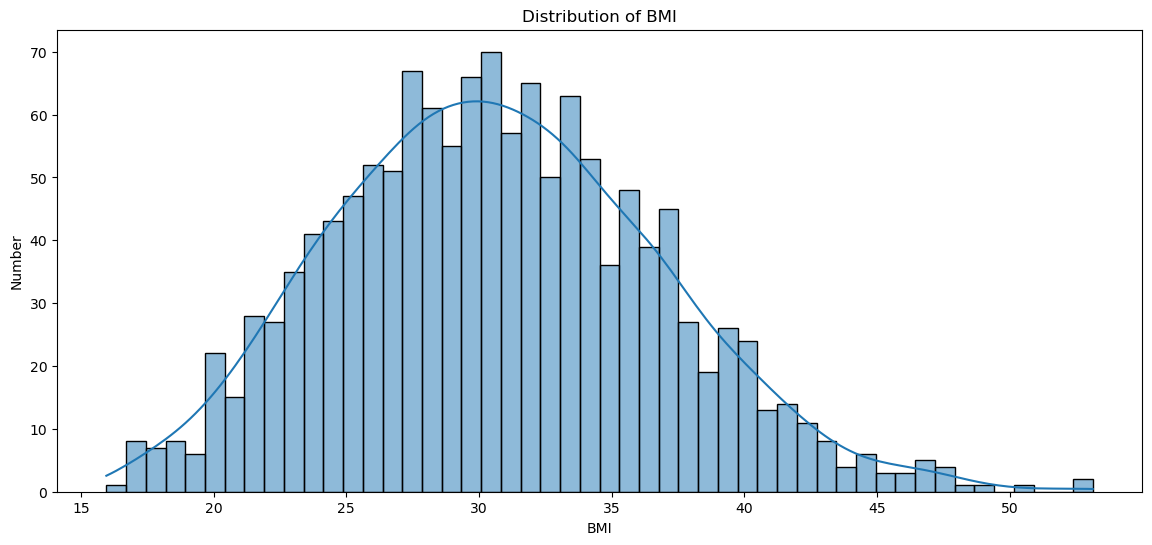

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(df["bmi"], bins = 50, kde = True)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Number')
plt.show()

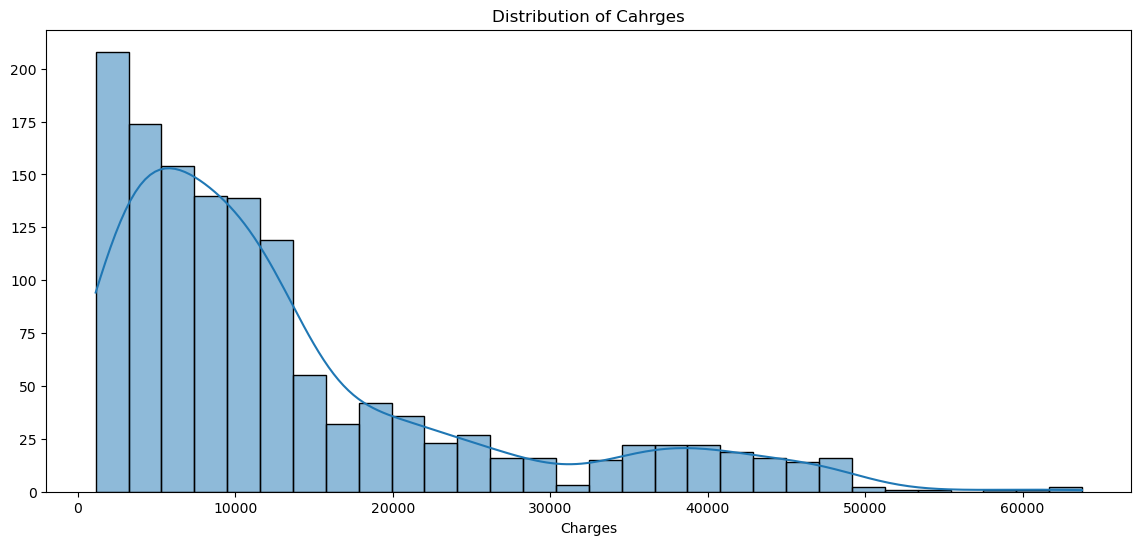

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(df["charges"], bins = 30, kde = True)
plt.title('Distribution of Cahrges')
plt.xlabel('Charges')
plt.ylabel('')
plt.show()

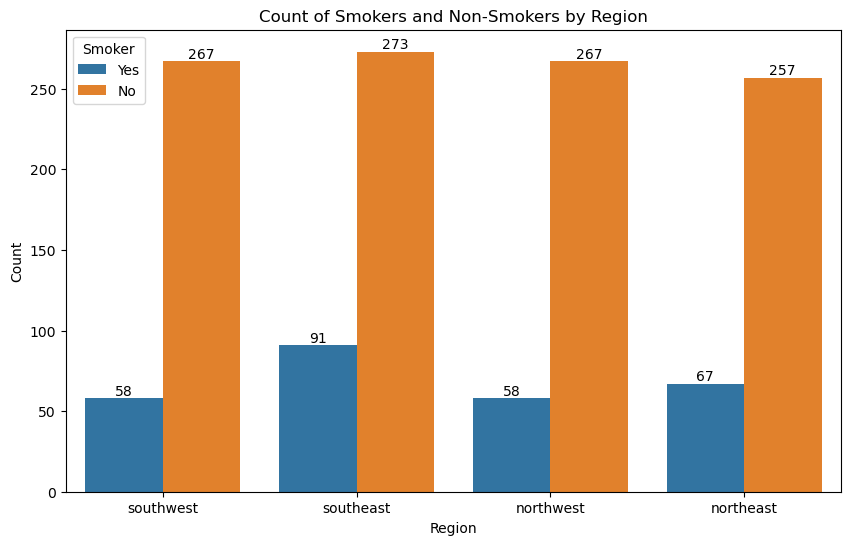

In [ ]:
plt.figure(figsize = (10,6))
ax = sns.countplot(data = df, x = 'region', hue = 'smoker')
plt.title('Count of Smokers and Non-Smokers by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title = 'Smoker', labels = ['Yes', 'No'])
for i in ax.containers:
    ax.bar_label(i)

plt.show()

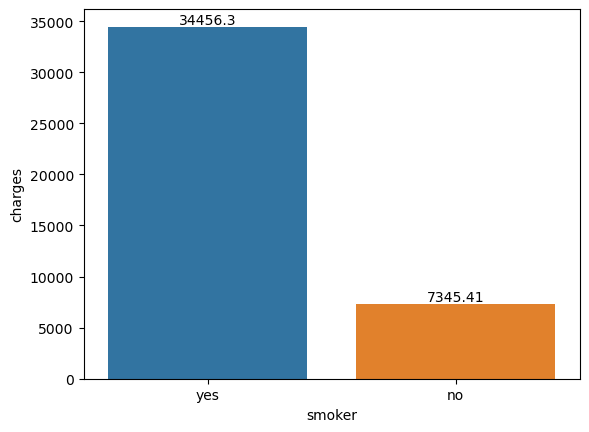

In [ ]:
ax = sns.barplot(x = df.smoker , y = df.charges, errorbar=None, estimator = "median")
for i in ax.containers:
    ax.bar_label(i)

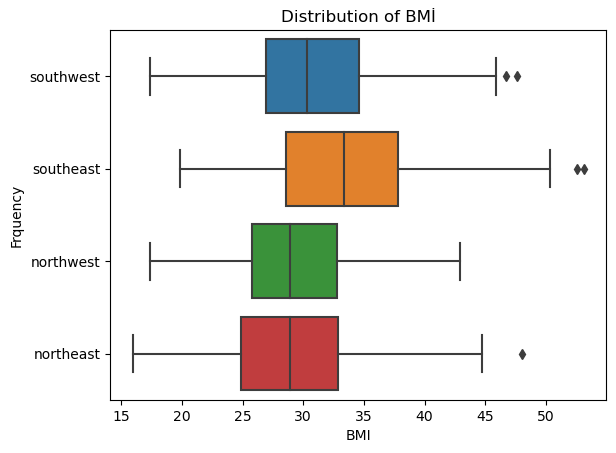

In [ ]:
sns.boxplot(data=df, x="bmi", y="region")
plt.xlabel('BMI')
plt.ylabel('Frquency')
plt.title('Distribution of BMİ')
plt.show()

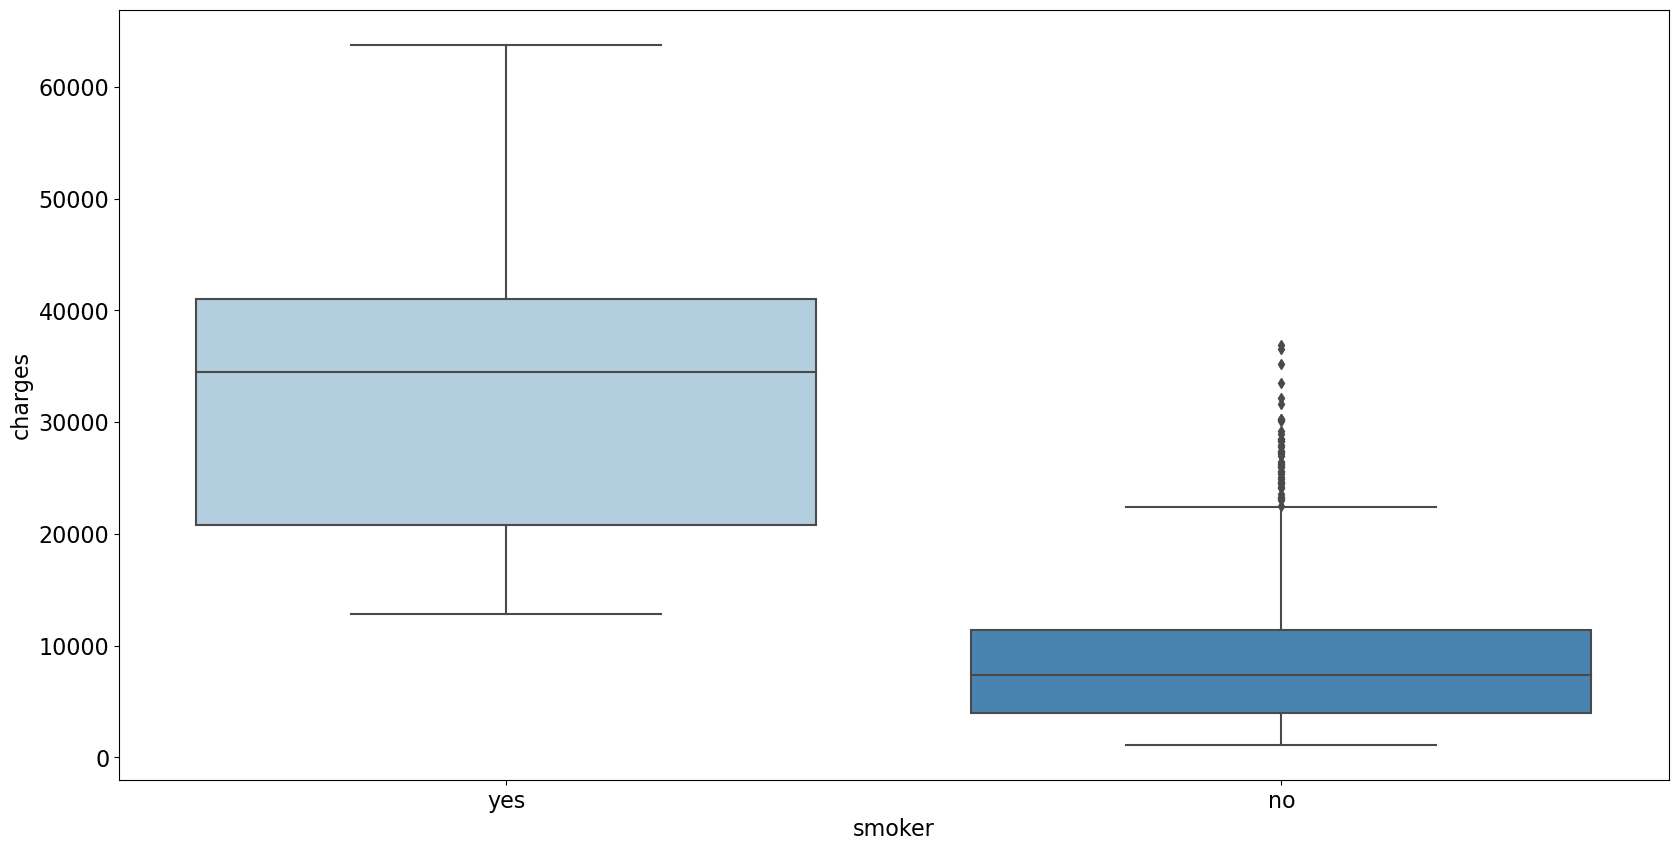

In [ ]:
plt.figure(figsize=(20, 10))
sns.boxplot(x="smoker", y="charges", data=df, palette="Blues",)
plt.xlabel('smoker',fontsize=16)
plt.ylabel('charges',fontsize=16)
plt.tick_params(labelsize=16)
plt.show()

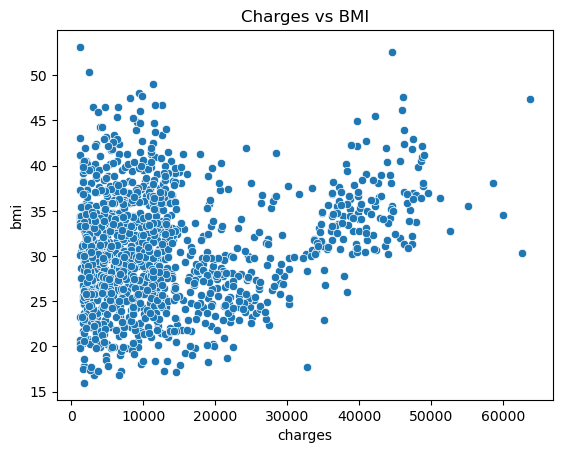

In [ ]:
sns.scatterplot(x='charges', y='bmi', data=df)
plt.title('Charges vs BMI')
plt.show()

### Regresja liniowa - (ręczna zajęcia)

In [ ]:
charge = df['charges'].to_numpy()
charge

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

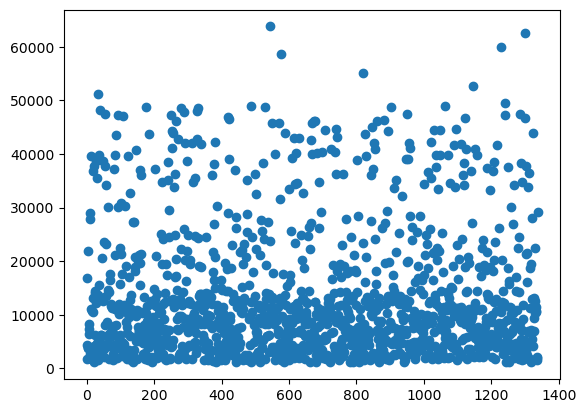

In [ ]:
plt.plot(charge, linestyle='none', marker='o')
plt.show()

In [ ]:
A = (0, charge[0])
B = (charge.size-1, charge[charge.size-1])
print(f'A = {A}, B = {B}')

A = (0, 16884.924), B = (1337, 29141.3603)


In [ ]:
a = (B[1]-A[1])/(B[0]-A[0])
b = A[1]-a*A[0]
print("a = {0:.3f}, b = {1}".format(a,b))

a = 9.167, b = 16884.924


In [ ]:
def linear_function(a,b,x):
    return a*x+b

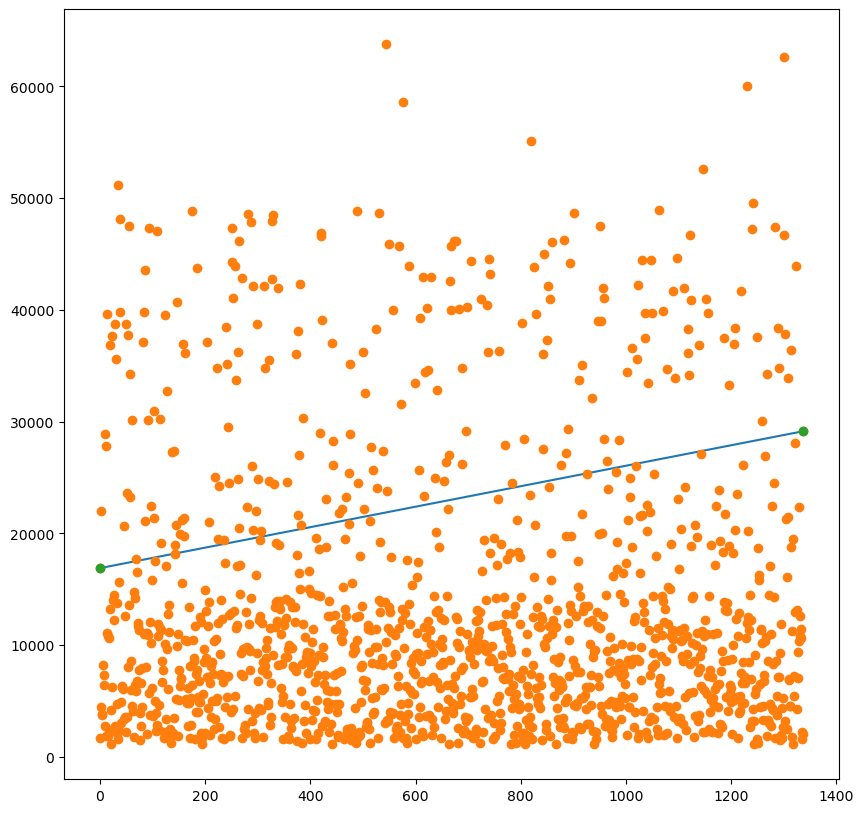

In [ ]:
fig = plt.figure(figsize=(10,10))
xDraw = np.arange(math.floor(A[0])-1, math.ceil(B[0])+2)
yDraw = linear_function(a,b,xDraw)
plt.plot(xDraw, yDraw)
plt.plot(charge, linestyle="none", marker='o')
plt.plot([A[0], B[0]], [A[1], B[1]], linestyle="none", marker='o', markersize=6)
plt.show()

### Implementacja równania regresji liniowej oraz współczynnik determinacji

In [ ]:
y = charge
x = np.arange(0, charge.size, 1)
print("x.shape", x.shape)
print("y.shape", y.shape)

x.shape (1338,)
y.shape (1338,)


In [ ]:
y,x

(array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
        29141.3603]),
 array([   0,    1,    2, ..., 1335, 1336, 1337]))

In [ ]:
x_mean = x.mean()
x_mean

668.5

In [ ]:
y_mean = y.mean()
y_mean

13270.422265141257

In [ ]:
x_sub = x-x_mean
x_sub

array([-668.5, -667.5, -666.5, ...,  666.5,  667.5,  668.5])

In [ ]:
y_sub = y-y_mean
y_sub

array([  3614.50173486, -11544.86996514,  -8820.96026514, ...,
       -11640.58876514, -11262.47726514,  15870.93803486])

In [ ]:
x_sub_times_y_sub = x_sub*y_sub
x_sub_times_y_sub

array([-2416294.40975307,  7706200.70173179,  5879170.01671665, ...,
       -7758452.41196665, -7517703.57448179, 10609722.07630307])

In [ ]:
x_sub_sq = np.square(x_sub)
x_sub_sq

array([446892.25, 445556.25, 444222.25, ..., 444222.25, 445556.25,
       446892.25])

In [ ]:
xy_sum = x_sub_times_y_sub.sum()
xy_sum

-21099496.012768432

In [ ]:
x_sum = x_sub_sq.sum()
x_sum

199612094.5

In [ ]:
a = xy_sum/x_sum
a

-0.10570249295574839

In [ ]:
b = y_mean - a*x_mean
b

13341.084381682174

In [ ]:
y_ref = y
y_pred = linear_function(a,b,x)

In [ ]:
#bład

def r_square(y_pred, y_ref, y_mean):
    up = np.sum(np.square(y_ref-y_mean))
    down = np.sum(np.square(y_pred-y_mean))
    return up/down

In [ ]:
print("R^2 dla modelu regresji liniowej:\n", r_square(y_pred, y_ref, y_mean))

R^2 dla modelu regresji liniowej:
 87915.04194079449


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_ref, y_pred)

1.1374617789328134e-05

### Regresja sklearn

In [ ]:
x = df.charges.to_numpy()
y = df.age.to_numpy()

In [ ]:
model = LinearRegression()

In [ ]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [ ]:
x.shape

(1338, 1)

In [ ]:
model.fit(x,y)

LinearRegression()

In [ ]:
model.score(x,y)

0.08940589967885793

In [ ]:
model.intercept_

array([34.6034169])

In [ ]:
b = model.intercept_[0]
b

34.6034168963318

In [ ]:
model.coef_

array([[0.00034691]])

In [ ]:
a = model.coef_[0][0]
a

0.00034690746253208894

In [ ]:
def linear_function(a,b,x):
    return a*x+b

In [ ]:
y_pred = linear_function(a,b,x)

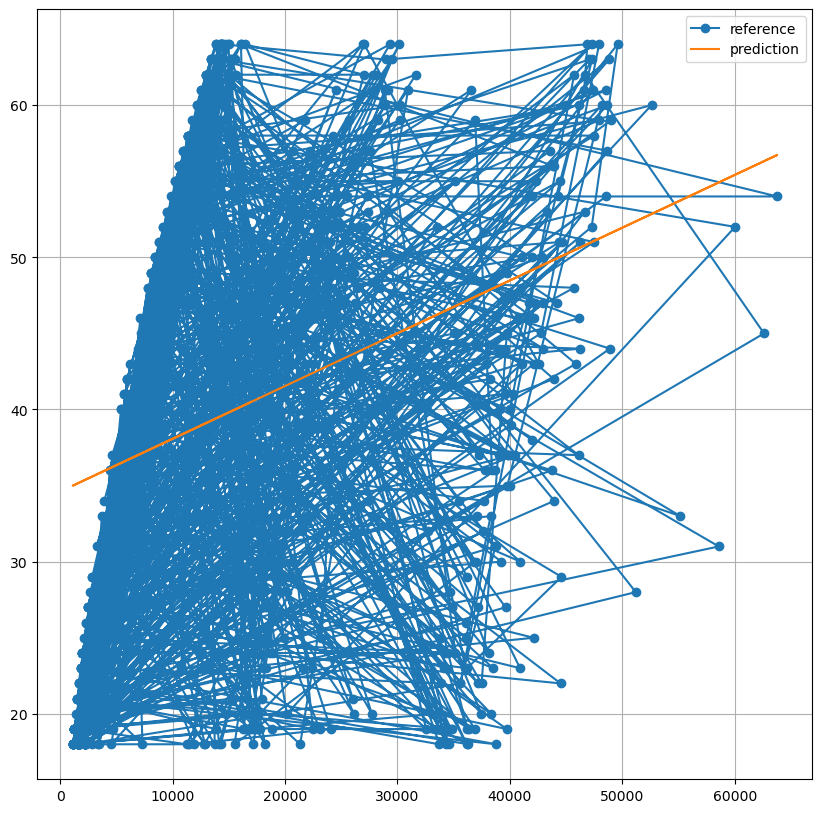

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,marker='o')
plt.plot(x,y_pred)
plt.grid()
plt.legend(["reference", "prediction"])
plt.show()

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print("R^2 dla modelu liniowego:\n", r2_score(y,y_pred))

R^2 dla modelu liniowego:
 0.08940589967885793


In [ ]:
x[-1][0]

29141.3603

In [ ]:
x_tmp = np.array([x[-1][0],15]).reshape(-1,1)
y_far_away = model.predict(x_tmp)
y_far_away

array([[44.71277225],
       [34.60862051]])

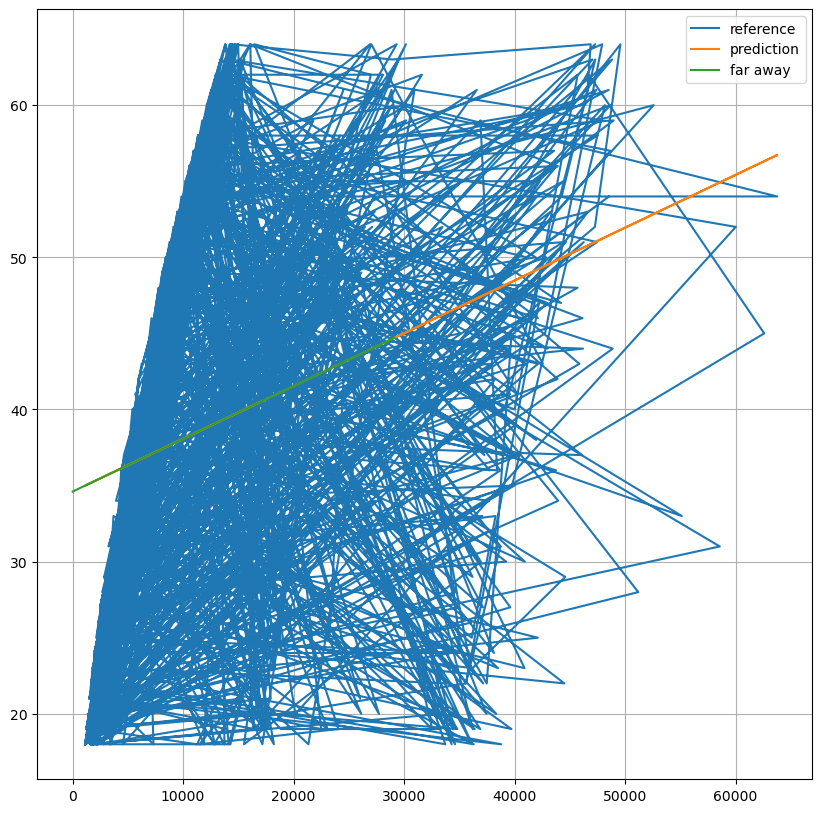

In [ ]:
fig = plt.figure(figsize=(10,10))
plt.plot(x,y,)
plt.plot(x,y_pred)
plt.plot(x_tmp.reshape(-1), y_far_away.reshape(-1))
plt.grid()
plt.legend(["reference", "prediction", "far away"])
plt.show()

### sklearn

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=110)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
m=MinMaxScaler()
x_train=m.fit_transform(x_train)
x_test=m.transform(x_test)

In [ ]:
x_train

array([[2.82167037e-01],
       [9.44961258e-02],
       [1.22858171e-01],
       [5.43552207e-02],
       [1.31864330e-01],
       [8.11087561e-03],
       [9.01970767e-02],
       [1.90494602e-01],
       [2.49761603e-01],
       [3.39743109e-01],
       [1.28396672e-01],
       [8.15274479e-02],
       [1.62672405e-02],
       [1.05647569e-01],
       [7.40194544e-01],
       [2.66567840e-02],
       [1.18245680e-01],
       [6.54433502e-01],
       [1.03659566e-01],
       [2.93492202e-01],
       [1.26383413e-01],
       [1.79314077e-01],
       [5.65922509e-01],
       [1.71176215e-02],
       [1.01857605e-02],
       [1.25451043e-02],
       [5.93101574e-01],
       [3.18502505e-01],
       [5.27213628e-02],
       [1.14614562e-01],
       [9.67241112e-03],
       [3.41215973e-02],
       [6.39658220e-02],
       [5.34593082e-01],
       [3.86771730e-02],
       [3.73554165e-02],
       [1.95709826e-01],
       [1.90143989e-01],
       [5.13341654e-02],
       [4.19282156e-02],


In [ ]:
x_test

array([[ 1.13373454e-01],
       [ 4.67219012e-02],
       [ 1.68045874e-01],
       [ 7.54226892e-02],
       [ 1.26554282e-01],
       [ 1.10021512e-01],
       [ 4.47884081e-01],
       [ 7.66755412e-02],
       [ 7.30800866e-02],
       [ 1.54461989e-01],
       [ 1.96676685e-01],
       [ 1.51182447e-01],
       [ 3.12545512e-01],
       [ 2.84822727e-01],
       [ 9.12774242e-02],
       [ 1.13679762e-01],
       [ 2.69839597e-01],
       [ 4.19086878e-02],
       [ 2.97225373e-01],
       [ 4.67314217e-02],
       [ 2.92323790e-01],
       [ 6.09565429e-02],
       [ 7.28289025e-02],
       [ 1.86752074e-01],
       [ 2.16801900e-01],
       [ 5.16299843e-01],
       [ 1.63836776e-01],
       [ 5.35460060e-01],
       [ 1.30248617e-01],
       [ 1.74022449e-02],
       [ 4.18502345e-01],
       [ 2.60819901e-01],
       [ 1.62429808e-01],
       [ 4.36553309e-01],
       [ 1.12249852e-01],
       [ 1.91576160e-02],
       [ 5.80052088e-01],
       [ 4.82052058e-02],
       [ 4.8

In [ ]:
from sklearn.linear_model import LinearRegression
l=LinearRegression()
l.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=l.predict(x_test)

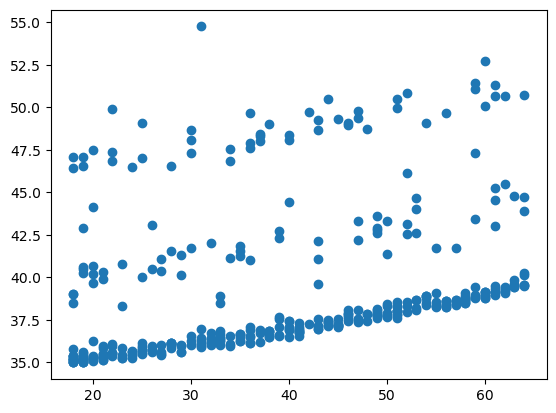

In [ ]:
plt.scatter(y_test,y_pred)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.09469115227962899

In [ ]:
from sklearn.linear_model import Ridge
alpha=0
rid=Ridge(alpha=alpha)
rid.fit(x_train,y_train)

Ridge(alpha=0)

In [ ]:
train_ridge=rid.score(x_train,y_train)
test_ridge=rid.score(x_test,y_test)

In [ ]:
train_ridge

0.08681507974207148

In [ ]:
test_ridge

0.09469115227962899

In [ ]:
y_ridge_pred=rid.predict(x_test)


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_ridge_pred)
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 187.41


In [ ]:
from sklearn.linear_model import Lasso
l=Lasso(alpha=0)
l.fit(x_train,y_train)

c:\Users\Szymon\Anaconda3\Lib\site-packages\sklearn\base.py:1151: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
c:\Users\Szymon\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Users\Szymon\Anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.250e+04, tolerance: 1.807e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordi

Lasso(alpha=0)

In [ ]:
train_lasso_score=l.score(x_train,y_train)
test_lasso_score=l.score(x_test,y_test)

In [ ]:
train_lasso_score


0.08681507974207148

In [ ]:
test_lasso_score

0.09469115227962899

In [ ]:
lasso_pred_y=l.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, lasso_pred_y)
mse

187.4085277384578